In [113]:
import qiskit
from qiskit import QuantumCircuit

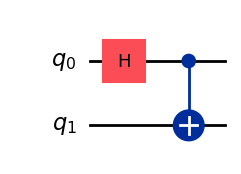

In [114]:
qc = QuantumCircuit(2)

qc.h(0)
qc.cx(0,1)

qc.draw(output='mpl')

In [115]:
from qiskit.quantum_info import Pauli

ZZ = Pauli('ZZ')
ZI = Pauli('ZI')
IZ = Pauli('IZ')
XX = Pauli('XX')
XI = Pauli('XI')
IX = Pauli('IX')
ZX = Pauli('ZX')

observables = [ZZ, ZI, IZ, XX, XI, IX, ZX]

In [116]:
from qiskit_aer.primitives import Estimator

estimator = Estimator()

job = estimator.run([qc] * len(observables), observables)

job.result()

EstimatorResult(values=array([1.        , 0.0234375 , 0.0234375 , 1.        , 0.        ,
       0.        , 0.01367188]), metadata=[{'shots': 1024, 'variance': 0.0, 'simulator_metadata': [{'batched_shots_optimization': False, 'required_memory_mb': 0, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'time_taken': 0.0041773, 'sample_measure_time': 0.0005934, 'input_qubit_map': [[0, 0], [1, 1]], 'max_memory_mb': 16297, 'measure_sampling': True, 'noise': 'ideal', 'parallel_shots': 1, 'parallel_state_update': 16, 'runtime_parameter_bind': False, 'num_bind_params': 1, 'fusion': {'enabled': False}}]}, {'shots': 1024, 'variance': 0.99945068359375, 'simulator_metadata': [{'batched_shots_optimization': False, 'required_memory_mb': 0, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'time_taken': 0.0041773, 'sample_measure_time': 0.

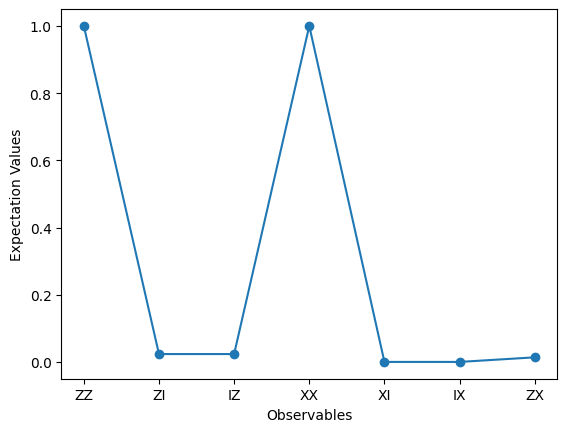

In [117]:
import matplotlib.pyplot as plt

data = ['ZZ', 'ZI', 'IZ', 'XX', 'XI', 'IX', 'ZX']
values = job.result().values

plt.plot(data, values, '-o')
plt.xlabel('Observables')
plt.ylabel('Expectation Values')
plt.show()

In [128]:
from qiskit import QuantumCircuit                                                                                                                                                               # type: ignore
from qiskit.quantum_info import Statevector, SparsePauliOp
from qiskit.quantum_info import Pauli                                                                                                                                      # type: ignore
from qiskit_aer.primitives import Estimator                                                                                                                                                     # type: ignore
import numpy as np                 
from qiskit.visualization import plot_bloch_vector
import matplotlib.pyplot as plt                                                                                                                                                             # type: ignore

# Step 1: Define states and normalize
psi = np.array([0, 1])  # State |ψ⟩
phi = np.array([0, 1])  # State |φ⟩

psi_norm = psi / np.linalg.norm(psi)
phi_norm = phi / np.linalg.norm(phi)

# Step 2: Rotation gate to convert normalized vector into quantum state
def encode_vector(vector):
    theta = 2 * np.arccos(vector[0])                # Calculate the angle θ for the rotation gate
    qc = QuantumCircuit(1)                          # Create qubit
    qc.ry(theta, 0)                                 # Apply Ry rotation to qubit
    state = Statevector.from_label('0').evolve(qc)  # Apply rotation to statevector
    return state                                    # Returns state

# Step 3: Prepare quantum states
state_psi = encode_vector(psi_norm)  # Represents |ψ⟩
state_phi = encode_vector(phi_norm)  # Represents |φ⟩

# Step 4: Initializing and performing SWAP test
qc = QuantumCircuit(3)            # Create a Quantum Circuit with 3 qubits
qc.h(0)                           # Place Hadamard gate on ancillary qubit
qc.initialize(state_psi.data, 1)  # Initialize qubit 1 with |ψ⟩
qc.initialize(state_phi.data, 2)  # Initialize qubit 2 with |φ⟩
qc.cswap(0, 1, 2)                 # Perform controlled SWAP test between |ψ⟩ and |φ⟩
qc.h(0)                           # Place Hadamard gate on ancillary qubit

# Step 5: Define observable, run Estimator & obtain result
observable = SparsePauliOp.from_list([("ZII", 1)]) # Observable to measure Pauli-Z on ancillary qubit (|0⟩⟨0|)
estimator = Estimator()
job = estimator.run([qc], [observable])
result = job.result()                              # Expectation value of observable

# Step 6: Calculate overlap and Euclidean distance
probability = (1 + result.values[0]) / 2           # Convert expectation value to probability
overlap = 2 * probability - 1
euclidean_distance = np.sqrt(1 - overlap**2)

# Step 7: Print results
print(f"Overlap: {overlap}")
print(f"Euclidean Distance: {euclidean_distance}")

Overlap: -1.0
Euclidean Distance: 0.0


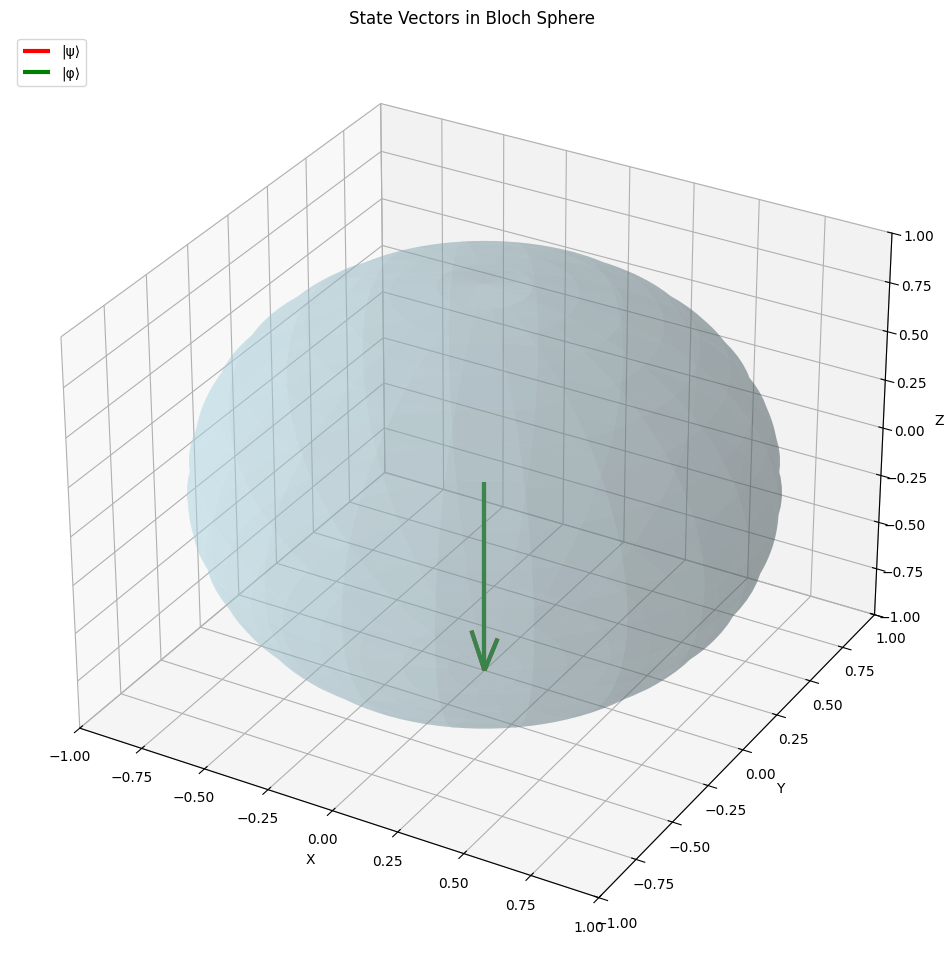

In [119]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from qiskit.quantum_info import Pauli

# Function to calculate Bloch vector from Statevector
def get_bloch_vector(state):
    """Convert a Statevector to a Bloch vector."""
    paulis = [Pauli("X"), Pauli("Y"), Pauli("Z")]  # Define Pauli operators
    return [state.expectation_value(pauli).real for pauli in paulis]  # Expectation values for Bloch vector components

# Custom Bloch sphere visualization for superimposed vectors
def plot_superimposed_bloch(bloch_vectors, titles, colors):
    """
    Visualize multiple Bloch vectors on a single 3D Bloch sphere.
    """
    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the Bloch sphere
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = np.outer(np.cos(u), np.sin(v))
    y = np.outer(np.sin(u), np.sin(v))
    z = np.outer(np.ones(np.size(u)), np.cos(v))
    ax.plot_surface(x, y, z, color='lightblue', alpha=0.3, rstride=5, cstride=5)

    # Plot each Bloch vector
    for bloch_vector, title, color in zip(bloch_vectors, titles, colors):
        x, y, z = bloch_vector
        ax.quiver(0, 0, 0, x, y, z, color=color, linewidth=3, arrow_length_ratio=0.2, label=title)

    # Set limits and labels
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([-1, 1])
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.set_title("State Vectors in Bloch Sphere")
    ax.legend(loc="upper left")
    plt.show()

# Get Bloch vectors for |ψ⟩ and |φ⟩
bloch_psi = get_bloch_vector(state_psi)
bloch_phi = get_bloch_vector(state_phi)

# Plot superimposed Bloch vectors
plot_superimposed_bloch(
    bloch_vectors=[bloch_psi, bloch_phi],
    titles=["|ψ⟩", "|φ⟩"],
    colors=["red", "green"]
)


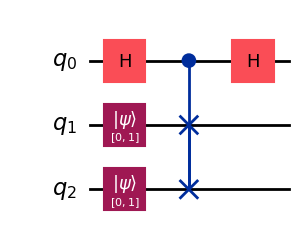

In [120]:
qc.draw(output='mpl')